<a href="https://colab.research.google.com/github/Raulfb04/EDP-1/blob/main/Serie%20de%20Fourier%20-%20Actividad%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grafica de una serie de Fourier

$f(x) =
\begin{cases}
0, & \text{si } -2 \leq x < 0, \\
2 - x, & \text{si } 0 \leq x \leq 2.
\end{cases}$


En esta actividad vamos a crear un codigo para poder graficar una serie de Fourier a trozos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [16]:
# Definir la variable simbólica
t = sp.Symbol('t')
L = 2  # Periodo semi-abierto [-L, L]

In [17]:
# Parámetros para la ecuación del calor
x = sp.Symbol('x')
n_terms = 10  # Número de términos de la serie de Fourier
alpha = 1  # Coeficiente de difusión térmica
time = 0.1  # Tiempo en el que evaluamos la solución


In [18]:
# Coeficientes de Fourier dados
a_0 = 1
a_n = lambda n: (2 / (n * sp.pi) ** 2) * (1 - (-1) ** n)
b_n = lambda n: (2 / (n * sp.pi)) * (-1) ** n


In [19]:
# Solución de la ecuación del calor usando la serie de Fourier
heat_equation = a_0
for n in range(1, n_terms + 1):
    term = (a_n(n) * sp.cos(n * sp.pi * x / L) + b_n(n) * sp.sin(n * sp.pi * x / L)) * sp.exp(-alpha * (n * sp.pi / L) ** 2 * time)
    heat_equation += term

In [12]:
# Convertir la serie a función numérica
f_heat = sp.lambdify(x, heat_equation, 'numpy')

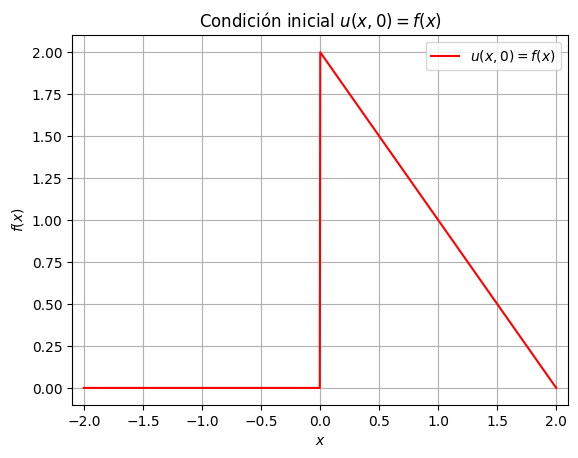

In [33]:
# Definir la función a trozos
def f(x):
    return np.piecewise(x, [(-2 <= x) & (x < 0), (0 <= x) & (x <= 2)], [0, lambda x: 2 - x])

# Crear valores de x en el intervalo adecuado
x = np.linspace(-2, 2, 1000)

# Evaluar la función
f_values = f(x)

# Graficar la condición inicial
plt.plot(x, f_values, label='$u(x,0)=f(x)$', color='r')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Condición inicial $u(x,0)=f(x)$")
plt.xlim([-2.1, 2.1])
plt.ylim([-0.1, 2.1])
plt.grid()
plt.legend()
plt.show()

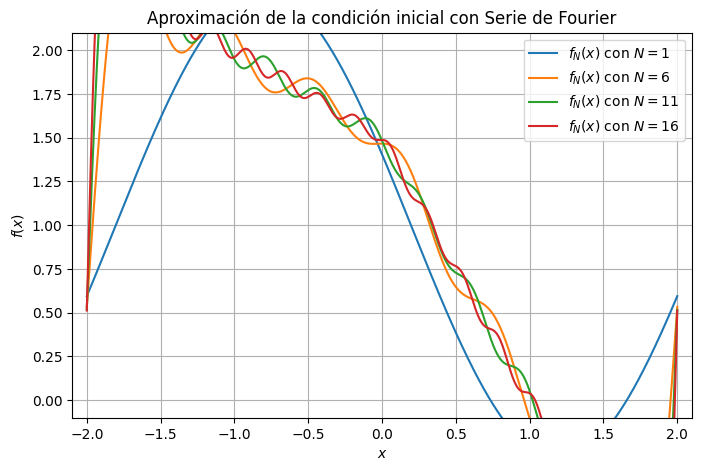

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir la variable y parámetros
x = sp.Symbol('x')
L = 2  # Intervalo [-L, L]
alpha = 1  # Coeficiente de difusión térmica
time = 0  # Evaluamos la condición inicial

# Coeficientes de Fourier dados
a_0 = 1
a_n = lambda n: (2 / (n * sp.pi) ** 2) * (1 - (-1) ** n)
b_n = lambda n: (4 / (n * sp.pi)) * (-1) ** n

# Definir función de aproximación con N términos de la serie
def u_0(x_vals, N):
    fourier_series = a_0
    for n in range(1, N + 1):
        term = (a_n(n) * sp.cos(n * sp.pi * x / L) + b_n(n) * sp.sin(n * sp.pi * x / L))
        fourier_series += term
    f_approx = sp.lambdify(x, fourier_series, 'numpy')
    return f_approx(x_vals)

# Crear valores de x
x_vals = np.linspace(-2, 2, 1000)

# Graficar la aproximación con distintos valores de N
plt.figure(figsize=(8, 5))
for i in range(1, 20, 5):  # N toma valores 1, 6, 11, 16
    plt.plot(x_vals, u_0(x_vals, i), label='$f_N(x)$ con $N=%d$' % i)

# Configuración de la gráfica
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial con Serie de Fourier")
plt.xlim([-2.1, 2.1])
plt.ylim([-0.1, 2.1])
plt.grid()
plt.legend()
plt.show()


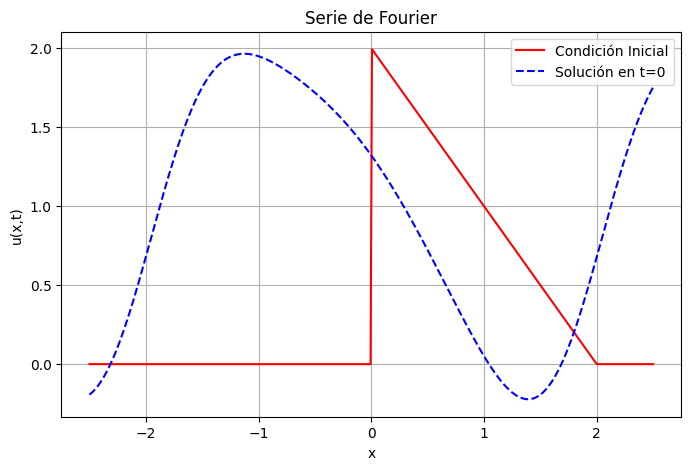

In [35]:
# Graficar
x_vals = np.linspace(-2.5, 2.5, 400)
y_real = np.piecewise(x_vals, [(-2 <= x_vals) & (x_vals < 0), (0 <= x_vals) & (x_vals <= 2)], [0, lambda x: 2 - x])
y_heat = f_heat(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_real, 'r', label='Condición Inicial')
plt.plot(x_vals, y_heat, 'b--', label=f'Solución en t={time}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid()
plt.title('Serie de Fourier')
plt.show()
